## Brain Tumor Segmentation using Watershed

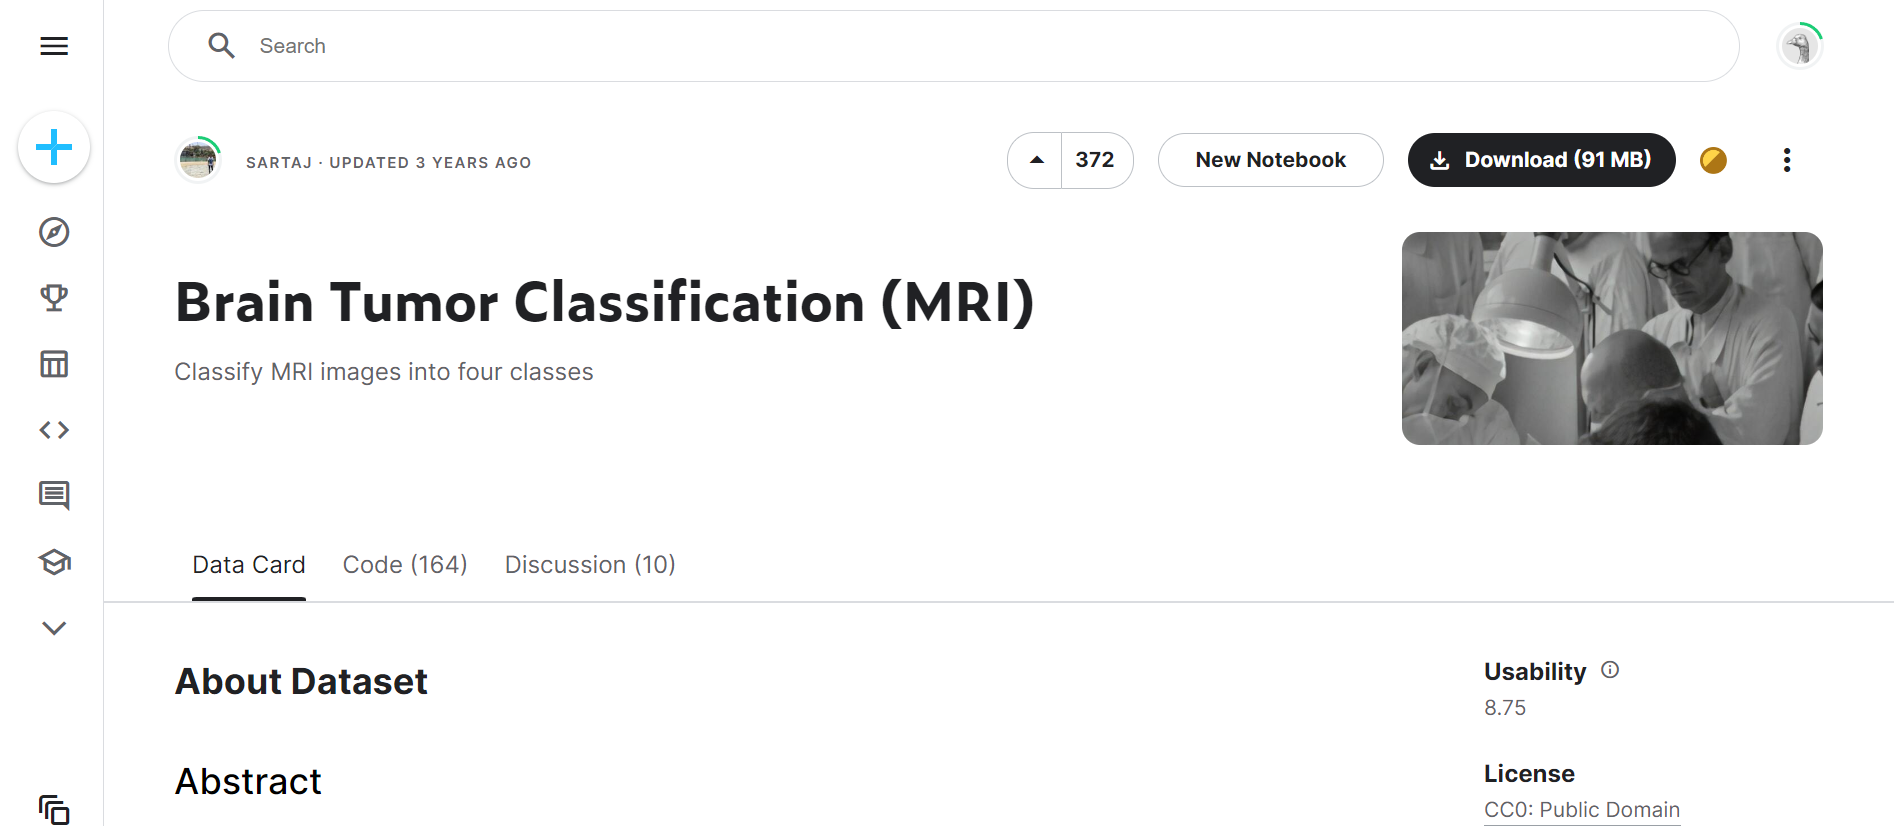

Dataset from kaggle: Brain Tumor Classification (MRI) <br>
link dataset: https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri <br>


In this experiment, a segmentation process will be carried out on 4 brain tumor MRI images, namely glioma tumor, meningioma tumor, normal, and pituitary tumor. The steps taken are as follows:


1.   Preprocessing: convert image to grayscale, smoothing and reduce noise, 
2.   Edge detection: using sobel x and y
3.   Thresholding: using binary threshold
4.   Foreground and background
5.   Watershed segmentation


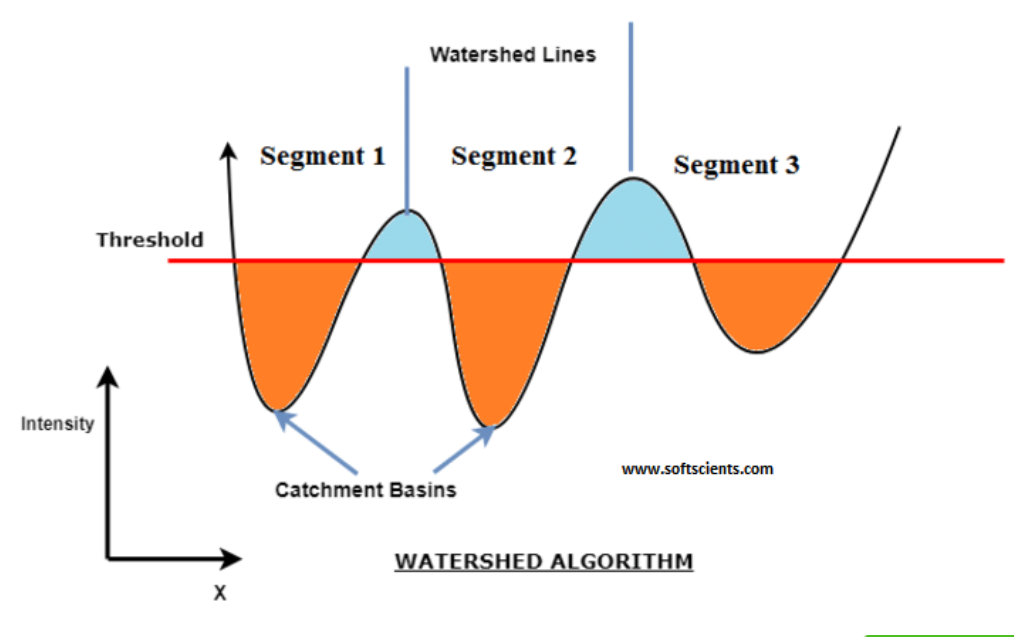

Watershed segmentation has a way of working by assuming that the image is a topography that will be filled with water and there are boundaries that separate each valley. In segmentation, the way it works is to look for the watershed line, namely the line with the highest point of the image delineation to the x and y positions. The x and y positions are the ground plane and pixel color intensity.

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

Insert "kaggle" file into choose files  

In [ ]:
files.upload() #insert "kaggle" file into button choose file, the file already exist in my zip file

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sarahnajibah","key":"a0c6584f4b7f78a42496f97d6e6aede6"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list -s brain-tumor

ref                                                          title                                        size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  ------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
jakeshbohaju/brain-tumor                                     Brain Tumor                                  14MB  2020-07-26 01:52:35           8344        212  0.9411765        
sartajbhuvaji/brain-tumor-classification-mri                 Brain Tumor Classification (MRI)             87MB  2020-05-24 16:24:55          20882        373  0.875            
jillanisofttech/brain-tumor                                  Brain Tumor                                 335KB  2022-01-12 10:23:23           1781         44  0.9705882        
masoudnickparvar/brain-tumor-mri-dataset                     Brain Tumor MRI Dataset                     149MB  202

In [ ]:
! kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri

 94% 82.0M/86.8M [00:00<00:00, 235MB/s]
100% 86.8M/86.8M [00:00<00:00, 213MB/s]


In [ ]:
import zipfile
import os

In [ ]:
! unzip \*.zip && rm *.zip

Archive:  brain-tumor-classification-mri.zip
  inflating: Testing/glioma_tumor/image(1).jpg  
  inflating: Testing/glioma_tumor/image(10).jpg  
  inflating: Testing/glioma_tumor/image(100).jpg  
  inflating: Testing/glioma_tumor/image(11).jpg  
  inflating: Testing/glioma_tumor/image(12).jpg  
  inflating: Testing/glioma_tumor/image(13).jpg  
  inflating: Testing/glioma_tumor/image(14).jpg  
  inflating: Testing/glioma_tumor/image(15).jpg  
  inflating: Testing/glioma_tumor/image(16).jpg  
  inflating: Testing/glioma_tumor/image(17).jpg  
  inflating: Testing/glioma_tumor/image(18).jpg  
  inflating: Testing/glioma_tumor/image(19).jpg  
  inflating: Testing/glioma_tumor/image(2).jpg  
  inflating: Testing/glioma_tumor/image(20).jpg  
  inflating: Testing/glioma_tumor/image(21).jpg  
  inflating: Testing/glioma_tumor/image(22).jpg  
  inflating: Testing/glioma_tumor/image(23).jpg  
  inflating: Testing/glioma_tumor/image(24).jpg  
  inflating: Testing/glioma_tumor/image(25).jpg  
  infl

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import cv2 

#Convert image to grayscale

The image is converted to grayscale format to simplify the image model so that it is easier for further image processing to be carried out. <br>
Then uniformized the size to 256x256. <br>
In convert process we use: `cv2.cvtColor(img_bgr, cv2.COLORBGR2RGB)` <br>  opencv using BGR and matplotlib using RGB, then imposed <br>
`cv2.cvtColor(img_rgb, cv2.IMREAD_GRAYSCALE)` to convert into grayscale.

In [ ]:
img_bgr1 = cv2.imread("/content/Testing/glioma_tumor/image(100).jpg")
img_bgr1 = cv2.resize(img_bgr1, (256,256))
img_rgb1 = cv2.cvtColor(img_bgr1, cv2.COLOR_BGR2RGB)

img_bgr2 = cv2.imread("/content/Testing/meningioma_tumor/image(106).jpg")
img_bgr2 = cv2.resize(img_bgr2, (256,256))
img_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)

img_bgr3 = cv2.imread("/content/Testing/no_tumor/image(100).jpg")
img_bgr3 = cv2.resize(img_bgr3, (256,256))
img_rgb3 = cv2.cvtColor(img_bgr3, cv2.COLOR_BGR2RGB)

img_bgr4 = cv2.imread("/content/Testing/pituitary_tumor/image(90).jpg")
img_bgr4 = cv2.resize(img_bgr4, (256,256))
img_rgb4 = cv2.cvtColor(img_bgr4, cv2.COLOR_BGR2RGB)

Text(0.5, 1.0, 'Pituitary Tumor Grayscale Image')

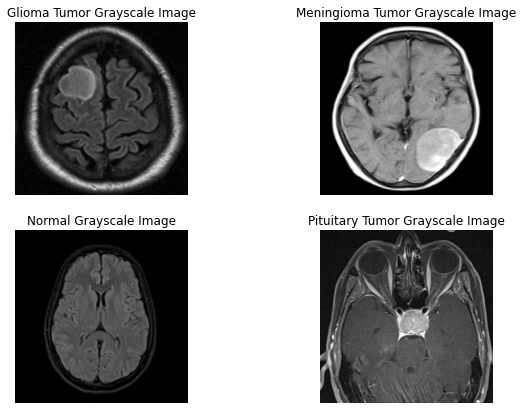

In [ ]:
rows = 2
columns = 2
fig = plt.figure(figsize=(10, 7))

img_gray1 = cv2.cvtColor(img_rgb1, cv2.IMREAD_GRAYSCALE)
fig.add_subplot(rows, columns, 1)
plt.axis('off')
plt.imshow(img_gray1)
plt.title("Glioma Tumor Grayscale Image")

img_gray2= cv2.cvtColor(img_rgb2, cv2.IMREAD_GRAYSCALE)
fig.add_subplot(rows, columns, 2)
plt.imshow(img_gray2)
plt.axis('off')
plt.title("Meningioma Tumor Grayscale Image")

img_gray3 = cv2.cvtColor(img_rgb3, cv2.IMREAD_GRAYSCALE)
fig.add_subplot(rows, columns, 3)
plt.imshow(img_gray3)
plt.axis('off')
plt.title("Normal Grayscale Image")

img_gray4 = cv2.cvtColor(img_rgb4, cv2.IMREAD_GRAYSCALE)
fig.add_subplot(rows, columns, 4)
plt.imshow(img_gray4)
plt.axis('off')
plt.title("Pituitary Tumor Grayscale Image")

#Smoothing and reduce noise

MRI images often have noise, such as gaussian noise, speckle noise, and salt and pepper noise which can cause poor image quality and omit important information. <br>

*   Salt and pepper noise which gives white spot noise on a black image and vice versa can be removed with a median filter. <br> Used: `img_med= cv2.medianBlur(img_gray,5)` <br>
*   Gaussian blur provides a smoothing effect that can remove noise and enhance image detail.
The Gaussian blur used has a kernel size of 5x5. Used: `cv2.GaussianBlur(img_gray, (5,5),0)` <br>

The image is subjected to a median filter to remove salt and pepper noise, then subjected to Gaussian blur to provide a smoothing effect.



Text(0.5, 1.0, 'Pituitary Tumor Smoothing Image')

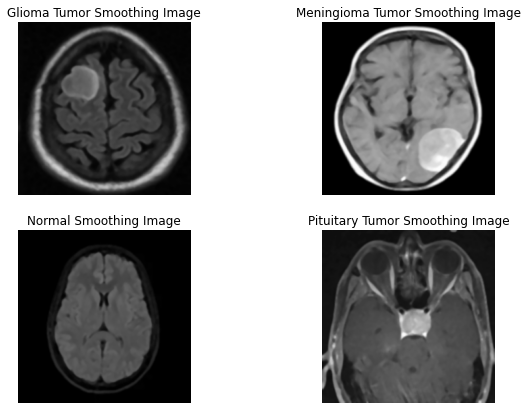

In [ ]:
rows = 2
columns = 2
fig = plt.figure(figsize=(10, 7))

img_med1= cv2.medianBlur(img_gray1,5)
img_gaus1 = cv2.GaussianBlur(img_med1,(3,3),0)
fig.add_subplot(rows, columns, 1)
plt.axis('off')
plt.imshow(img_gaus1)
plt.title("Glioma Tumor Smoothing Image")

img_med2= cv2.medianBlur(img_gray2,5)
img_gaus2 = cv2.GaussianBlur(img_med2,(3,3),0)
fig.add_subplot(rows, columns, 2)
plt.imshow(img_gaus2)
plt.axis('off')
plt.title("Meningioma Tumor Smoothing Image")

img_med3= cv2.medianBlur(img_gray3,5)
img_gaus3 = cv2.GaussianBlur(img_med3,(3,3),0)
fig.add_subplot(rows, columns, 3)
plt.imshow(img_gaus3)
plt.axis('off')
plt.title("Normal Smoothing Image")

img_med4= cv2.medianBlur(img_gray4,5)
img_gaus4 = cv2.GaussianBlur(img_med4,(3,3),0)
fig.add_subplot(rows, columns, 4)
plt.imshow(img_gaus4)
plt.axis('off')
plt.title("Pituitary Tumor Smoothing Image")

#Edge detection using sobelX, sobelY



Edge detection aims to clarify the boundaries of each region. Sobel x is used to detect the edges of the x-axis and sobel y on the y-axis and both are combined with the initial image to display clearer edges. In this case it is used:

```
img_sobelx = cv2.Sobel(img_gaus,cv2.CV_8U,dx=1,dy=0,ksize=3) 
img_sobely = cv2.Sobel(img_gaus,cv2.CV_8U,dx=0,dy=1,ksize=3)
img_sobel = img_sobelx+img_sobely+img_gray

```



Text(0.5, 1.0, 'Pituitary Sobel Image')

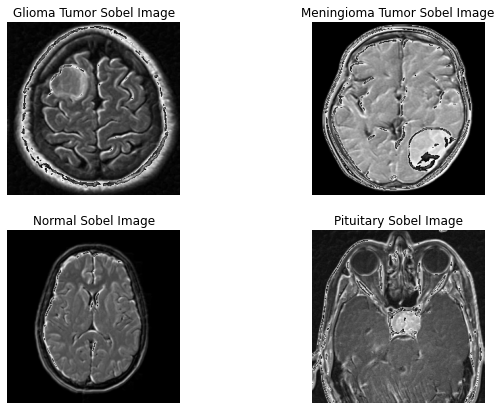

In [ ]:
rows = 2
columns = 2
fig = plt.figure(figsize=(10, 7))

img_sobelx_1 = cv2.Sobel(img_gaus1,cv2.CV_8U,dx=1,dy=0,ksize=3)
img_sobely_1 = cv2.Sobel(img_gaus1,cv2.CV_8U,dx=0,dy=1,ksize=3)
img_sobel1 = img_sobelx_1+img_sobely_1+img_gray1
ret, th1 = cv2.threshold(img_sobel1,55,255,cv2.THRESH_BINARY)
fig.add_subplot(rows, columns, 1)
plt.axis('off')
plt.imshow(img_sobel1)
plt.title("Glioma Tumor Sobel Image")

img_sobelx_2 = cv2.Sobel(img_gaus2,cv2.CV_8U,dx=1,dy=0,ksize=3)
img_sobely_2 = cv2.Sobel(img_gaus2,cv2.CV_8U,dx=0,dy=1,ksize=3)
img_sobel2 = img_sobelx_2+img_sobely_2+img_gray2
ret, th2 = cv2.threshold(img_sobel2,55,255,cv2.THRESH_BINARY)
fig.add_subplot(rows, columns, 2)
plt.imshow(img_sobel2)
plt.axis('off')
plt.title("Meningioma Tumor Sobel Image")

img_sobelx_3 = cv2.Sobel(img_gaus3,cv2.CV_8U,dx=1,dy=0,ksize=3)
img_sobely_3 = cv2.Sobel(img_gaus3,cv2.CV_8U,dx=0,dy=1,ksize=3)
img_sobel3 = img_sobelx_3+img_sobely_3+img_gray3
ret, th3 = cv2.threshold(img_sobel3,55,255,cv2.THRESH_BINARY)
fig.add_subplot(rows, columns, 3)
plt.imshow(img_sobel3)
plt.axis('off')
plt.title("Normal Sobel Image")

img_sobelx_4 = cv2.Sobel(img_gaus4,cv2.CV_8U,dx=1,dy=0,ksize=3)
img_sobely_4 = cv2.Sobel(img_gaus4,cv2.CV_8U,dx=0,dy=1,ksize=3)
img_sobel4 = img_sobelx_4+img_sobely_4+img_gray4
ret, th4 = cv2.threshold(img_sobel4,55,255,cv2.THRESH_BINARY)
fig.add_subplot(rows, columns, 4)
plt.imshow(img_sobel4)
plt.axis('off')
plt.title("Pituitary Sobel Image")

#Thresholding using Binary Threshold

After edge detection using sobel, binary thresholding is performed with the aim of separating the background from the foreground. <br> Used:

`ret, th = cv2.threshold(img_sobel,55,255,cv2.THRESH_BINARY)`

Text(0.5, 1.0, 'Pituitary Tumor Threhold Image')

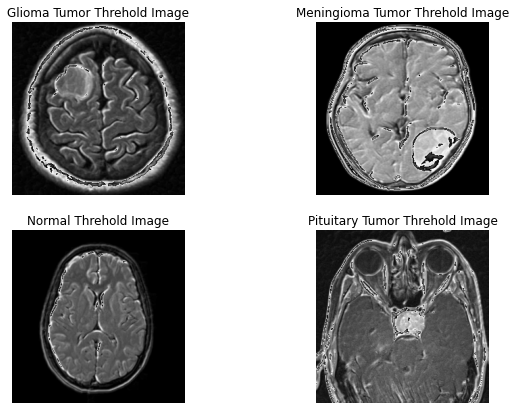

In [ ]:
 # Threshold the pixel values
rows = 2
columns = 2
fig = plt.figure(figsize=(10, 7))

ret, th1 = cv2.threshold(img_sobel1, 55, 255, cv2.THRESH_BINARY)
fig.add_subplot(rows, columns, 1)
plt.axis('off')
plt.imshow(img_sobel1, cmap='gray')
plt.title("Glioma Tumor Threhold Image")

ret, th2 = cv2.threshold(img_sobel2, 55, 255, cv2.THRESH_BINARY)
fig.add_subplot(rows, columns, 2)
plt.axis('off')
plt.imshow(img_sobel2, cmap='gray')
plt.title("Meningioma Tumor Threhold Image")

ret, th3 = cv2.threshold(img_sobel3, 55, 255, cv2.THRESH_BINARY)
fig.add_subplot(rows, columns, 3)
plt.axis('off')
plt.imshow(img_sobel3, cmap='gray')
plt.title("Normal Threhold Image")

ret, th4 = cv2.threshold(img_sobel4, 55, 255, cv2.THRESH_BINARY)
fig.add_subplot(rows, columns, 4)
plt.axis('off')
plt.imshow(img_sobel4, cmap='gray')
plt.title("Pituitary Tumor Threhold Image")

#Foreground Area

After separating the foreground and background using a binary threshold, then the opening morphology operation is performed to remove white noise and dilation to expand the boundary object to the background. An image consisting of foreground and background. <br> Then identify using distance transform to determine the foreground area. <br> Used:


```
dist_transform1 = cv2.distanceTransform(opening1,cv2.DIST_L2,5)
ret, sure_fg1 = cv2.threshold(dist_transform1,0.7*dist_transform1.max(),255,0)
```



In [ ]:
#having foreground and background image
kernel = np.ones((3,3),np.uint8)

opening1 = cv2.morphologyEx(th1, cv2.MORPH_OPEN,kernel,iterations=2)
opening2 = cv2.morphologyEx(th2, cv2.MORPH_OPEN,kernel,iterations=2)
opening3 = cv2.morphologyEx(th3, cv2.MORPH_OPEN,kernel,iterations=2)
opening4 = cv2.morphologyEx(th4, cv2.MORPH_OPEN,kernel,iterations=2)

In [ ]:
sure_bg1 = cv2.dilate(opening1,kernel,iterations=3)
sure_bg2 = cv2.dilate(opening2,kernel,iterations=3)
sure_bg3 = cv2.dilate(opening3,kernel,iterations=3)
sure_bg4 = cv2.dilate(opening4,kernel,iterations=3)

Text(0.5, 1.0, 'Pituitary Tumor Foreground Area')

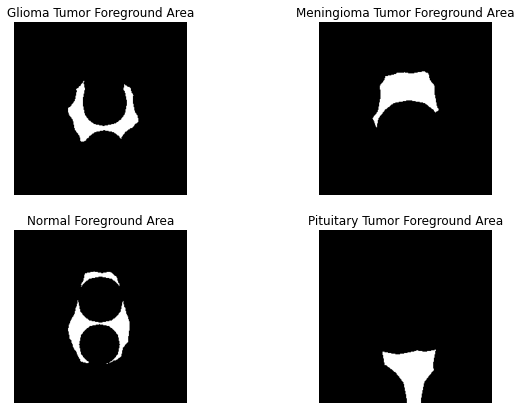

In [ ]:
rows = 2
columns = 2
fig = plt.figure(figsize=(10, 7))

opening1 = cv2.cvtColor(sure_bg1, cv2.COLOR_BGR2GRAY)
dist_transform1 = cv2.distanceTransform(opening1,cv2.DIST_L2,5)
ret, sure_fg1 = cv2.threshold(dist_transform1,0.7*dist_transform1.max(),255,0)
fig.add_subplot(rows, columns, 1)
plt.axis('off')
plt.imshow(sure_fg1, cmap='gray')
plt.title("Glioma Tumor Foreground Area")

opening2 = cv2.cvtColor(sure_bg2, cv2.COLOR_BGR2GRAY)
dist_transform2 = cv2.distanceTransform(opening2,cv2.DIST_L2,5)
ret, sure_fg2 = cv2.threshold(dist_transform2,0.7*dist_transform2.max(),255,0)
fig.add_subplot(rows, columns, 2)
plt.axis('off')
plt.imshow(sure_fg2, cmap='gray')
plt.title("Meningioma Tumor Foreground Area")

opening3 = cv2.cvtColor(sure_bg3, cv2.COLOR_BGR2GRAY)
dist_transform3 = cv2.distanceTransform(opening3,cv2.DIST_L2,5)
ret, sure_fg3 = cv2.threshold(dist_transform3,0.7*dist_transform3.max(),255,0)
fig.add_subplot(rows, columns, 3)
plt.axis('off')
plt.imshow(sure_fg3, cmap='gray')
plt.title("Normal Foreground Area")

opening4 = cv2.cvtColor(sure_bg4, cv2.COLOR_BGR2GRAY)
dist_transform4 = cv2.distanceTransform(opening4,cv2.DIST_L2,5)
ret, sure_fg4 = cv2.threshold(dist_transform4,0.7*dist_transform4.max(),255,0)
fig.add_subplot(rows, columns, 4)
plt.axis('off')
plt.imshow(sure_fg4, cmap='gray')
plt.title("Pituitary Tumor Foreground Area")

After the foreground is obtained, there are still undecided regions, so we need to identify these areas and if we pay attention, the undecided areas are the inverse of the foreground areas. <br> Used: 

```
sure_fg1 = np.uint8(sure_fg1)
undecided1 = cv2.subtract(sure_bg1,sure_fg1)
```



In [ ]:
sure_bg1 = cv2.cvtColor(sure_bg1, cv2.COLOR_BGR2GRAY)
sure_bg2 = cv2.cvtColor(sure_bg2, cv2.COLOR_BGR2GRAY)
sure_bg3 = cv2.cvtColor(sure_bg3, cv2.COLOR_BGR2GRAY)
sure_bg4 = cv2.cvtColor(sure_bg4, cv2.COLOR_BGR2GRAY)

Text(0.5, 1.0, 'Pituitary Tumor Undecided Area')

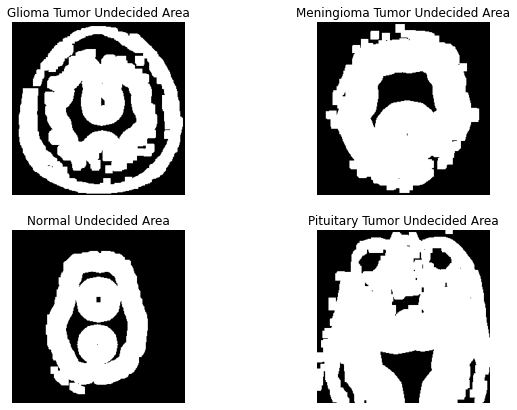

In [ ]:
rows = 2
columns = 2
fig = plt.figure(figsize=(10, 7))

sure_fg1 = np.uint8(sure_fg1)
undecided1 = cv2.subtract(sure_bg1,sure_fg1)
fig.add_subplot(rows, columns, 1)
plt.axis('off')
plt.imshow(undecided1, cmap='gray')
plt.title("Glioma Tumor Undecided Area")

sure_fg2 = np.uint8(sure_fg2)
undecided2 = cv2.subtract(sure_bg2,sure_fg2)
fig.add_subplot(rows, columns, 2)
plt.axis('off')
plt.imshow(undecided2, cmap='gray')
plt.title("Meningioma Tumor Undecided Area")

sure_fg3 = np.uint8(sure_fg3)
undecided3 = cv2.subtract(sure_bg3,sure_fg3)
fig.add_subplot(rows, columns, 3)
plt.axis('off')
plt.imshow(undecided3, cmap='gray')
plt.title("Normal Undecided Area")

sure_fg4 = np.uint8(sure_fg4)
undecided4 = cv2.subtract(sure_bg4,sure_fg4)
fig.add_subplot(rows, columns, 4)
plt.axis('off')
plt.imshow(undecided4, cmap='gray')
plt.title("Pituitary Tumor Undecided Area")

#Watershed Segmentation

Marking is done by creating an array that has the same size as the original image with the data type int32. The marker aims to distinguish between the undecided region and the background. This is because in the thresholding process, the background and undecided regions are both assigned the number 0. If both are 0, then watershed will consider the background as an undecided region which will result in an error in segmentation. So that the background must be given another value, so that it is not considered to be an undecided region, usually the background will be given a lighter color than the undecided region. While Contours aims to analyze the shape of the area.

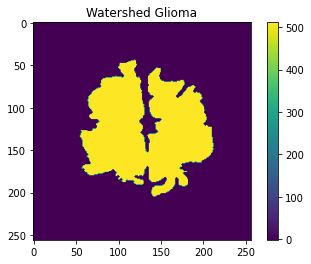

In [ ]:
contours, hierarchy = cv2.findContours(sure_fg1,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

# Creating a numpy array for markers and converting the image to 32 bit using dtype paramter
marker1 = np.zeros((img_gaus1.shape[0], img_gaus1.shape[1]),dtype = np.int32)
marker1 = np.int32(sure_fg1) + np.int32(sure_bg1)

# Marker Labelling
for i in range(len(contours)):
    cv2.drawContours(marker1 [i],contours [i],i,i+2, -1)

marker1 = marker1 + 1
marker1[undecided1==255] = 0

copy_img1 = img_rgb1.copy()
cv2.watershed(copy_img1, marker1)

imgplt = plt.imshow(marker1)
plt.colorbar()
plt.title('Watershed Glioma')
plt.show()

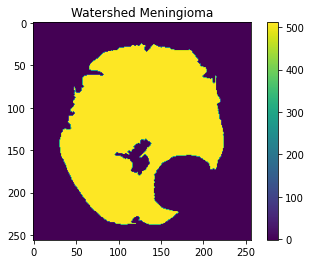

In [ ]:
contours2, hierarchy2 = cv2.findContours(sure_fg2,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
marker2 = np.zeros((img_gaus2.shape[0], img_gaus2.shape[1]),dtype = np.int32)
marker2 = np.int32(sure_fg2) + np.int32(sure_bg2)

# Marker Labelling
for i in range(len(contours2)):
    cv2.drawContours(marker2 [i],contours2 [i],i,i+2, -1)

marker2 = marker2 + 1
marker2[undecided2==255] = 0

copy_img2 = img_rgb2.copy()
cv2.watershed(copy_img2, marker2)

imgplt = plt.imshow(marker2)
plt.colorbar()
plt.title('Watershed Meningioma')
plt.show()

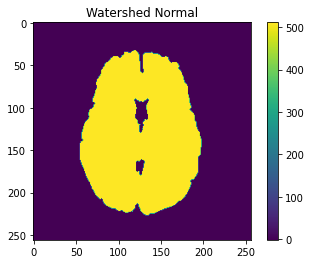

In [ ]:
contours3, hierarchy3 = cv2.findContours(sure_fg3,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
marker3 = np.zeros((img_gaus3.shape[0], img_gaus3.shape[1]),dtype = np.int32)
marker3 = np.int32(sure_fg3) + np.int32(sure_bg3)
# Marker Labelling
for i in range(len(contours3)):
    cv2.drawContours(marker3 [i],contours3 [i],i,i+2, -1)

marker3 = marker3 + 1
marker3[undecided3==255] = 0

copy_img3 = img_rgb3.copy()
cv2.watershed(copy_img3, marker3)

imgplt = plt.imshow(marker3)
plt.colorbar()
plt.title('Watershed Normal')
plt.show()

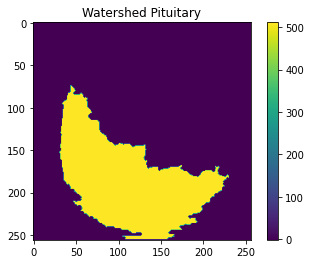

In [ ]:
contours4, hierarchy4 = cv2.findContours(sure_fg4,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
marker4 = np.zeros((img_gaus4.shape[0], img_gaus4.shape[1]),dtype = np.int32)
marker4 = np.int32(sure_fg4) + np.int32(sure_bg4)
# Marker Labelling
for i in range(len(contours4)):
    cv2.drawContours(marker4 [i],contours [i],i,i+2, -1)

marker4 = marker4 + 1
marker4[undecided4==255] = 0

copy_img4 = img_rgb4.copy()
cv2.watershed(copy_img1, marker4)

imgplt = plt.imshow(marker4)
plt.colorbar()
plt.title('Watershed Pituitary')
plt.show()

Text(0.5, 1.0, 'Pituitary Tumor Segmentation')

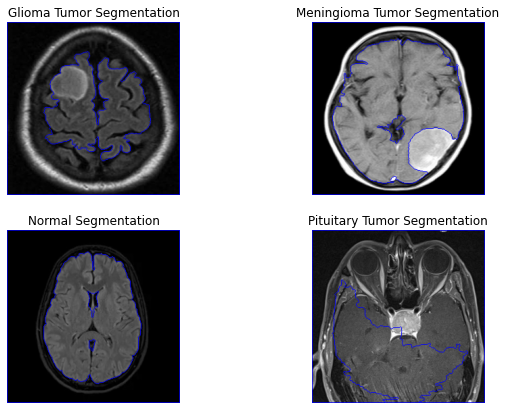

In [ ]:
rows = 2
columns = 2
fig = plt.figure(figsize=(10, 7))

copy_img1[marker1==-1]=(0,0,255)
cv2.imwrite('Glioma Tumor Segmentation.jpg',copy_img1)
fig.add_subplot(rows, columns, 1)
plt.imshow(copy_img1,cmap='gray')
plt.axis('off')
plt.title("Glioma Tumor Segmentation")

copy_img2[marker2==-1]=(0,0,255)
cv2.imwrite('Meningioma Tumor Segmentation.jpg',copy_img2)
fig.add_subplot(rows, columns, 2)
plt.imshow(copy_img2,cmap='gray')
plt.axis('off')
plt.title("Meningioma Tumor Segmentation")

copy_img3[marker3==-1]=(0,0,255)
cv2.imwrite('Normal Segmentation.jpg',copy_img3)
fig.add_subplot(rows, columns, 3)
plt.imshow(copy_img3,cmap='gray')
plt.axis('off')
plt.title("Normal Segmentation")

copy_img4[marker4==-1]=(0,0,255)
cv2.imwrite('Pituitary Tumor Segmentation.jpg',copy_img4)
fig.add_subplot(rows, columns, 4)
plt.imshow(copy_img4,cmap='gray')
plt.axis('off')
plt.title("Pituitary Tumor Segmentation")

From the results of the segmentation experiments that have been carried out using the watershed method on 4 MRI images, namely glioma tumors, meningioma tumors, normal, and pituitary tumors, it is found that the region is bounded by a blue mark to separate the brain from the bones or in this case, the skull. Overall the segmentation process has been successfully carried out, although it still needs some improvement, especially in the pituitary image which is still off the center and the area formed is still not appropriate.